#### [**NICOLAS CACHANOSKY**](http://www.ncachanosky.com) | Department of Economics | Metropolitan State University of Denver | ncachano@msudenver.edu

# LABOR MARKET
---

This note illustrates how to code a labor market in Python. The purpose of the note is to walk through Python applications, not to offer a detailed discussion of the labor market or to show best coding practices. The note also assumes familiarity with the neoclassical labor market model and a beginner experience with Python.

For a more complete and detailed discussion of Python applications see the material in [Quant Econ](https://quantecon.org/).

---

## TABLE OF CONTENTS
1. [Labor demand](#1.-LABOR-DEMAND)
2. [Labor supply](#2.-LABOR-SUPPLY)
3. [Equilibrium](#3.-EQUILIBRIUM)

## 1. LABOR DEMAND

Labor demand $\left(N^D\right)$ comes from a representative firm maximazing its profits $(\pi)$. Assume output $(Q)$ follows a Cobb-Douglas production function with Hicks-Neutral technology $(A)$, and that $P$ is the market price of the firm's output. Further, assume that $w$ and $r$ are the prices of labor $(N)$ and capital $(K)$ respectively. Then, firm's profit is (where $\alpha \in (0, 1)$):

\begin{align}
    \pi &= P \cdot Q(K, N) - wN - rK \\
    \pi &= P \cdot \left(A \cdot K^{\alpha} N^{1-\alpha} \right) - wN - rK
\end{align}

With capital and technology as given in the short-run, the firm maximizes its profits by changin the amount of labor. The firm demands labor (that has decreasing marginal returns) up the points of its marginal productivity. It can be seen that labor demand has an hyperbolic shape with respect to real wages $(w/P)$.

\begin{align}
    \frac{\partial \pi}{\partial N} &= P \cdot (1-\alpha) \, A \left(\frac{K}{N}\right)^{\alpha} - w= 0   \\
    N^D &= K \cdot \left[\frac{(1-\alpha)A}{(w/P)}\right]^{1/\alpha}
\end{align}

The following code plots labor demand and shifts produced by changes in $k$ (in blue), $A$ (in red), and in $\alpha$ (in green). The first part of the code imports the required packages. The second part defines the parameters and vectors to be used. The third part of the code builds the labor demand function. The fourth section calculates labor demand and the effects of shocks (1) capital $(\Delta K = 20)$, (2) productivity $(\Delta A = 20)$, and (3) output elasticity of capital $(\Delta \alpha = 20)$. The fifth part of the code plots labor demand and the shock effects.

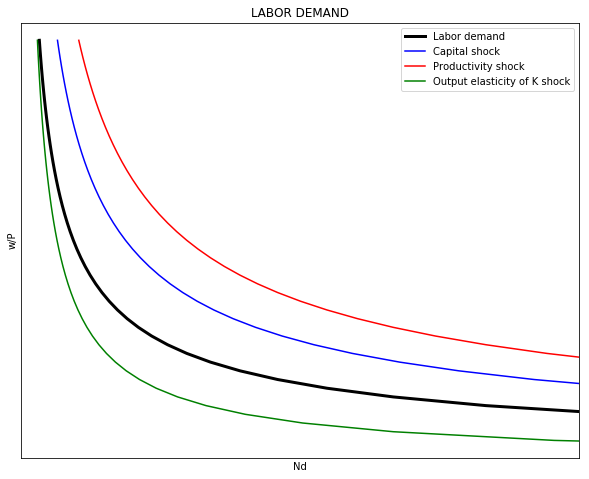

In [2]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
# Parameters
size = 50                        # Real wage domain
K = 20                           # Capital stock
A = 20                           # Technology
alpha = 0.6                      # Output elasticity of capital
# Arrays
rW = np.arange(size)             # Real wage
Nd = np.zeros(size)              # Labor demand

"3|LABOR DEMAND FUNCTION"
def N_demand(A, K, rW, alpha):
    Nd = K * ((1-alpha)*A/rW)**(1/alpha)
    return Nd

"4|CALCULATE LABOR DEMAND AND SHOCK EFFECTS"
Nd_K = np.zeros(size)    # Create empty array of capital shock
Nd_A = np.zeros(size)    # Create empty array of productivity shock
Nd_a = np.zeros(size)    # Create empty array of output elasticity of K shock

D_K = 20
D_A = 20
D_a = 0.2

for i in range(1, size):
    Nd[i]   = N_demand(A    , K    , i, alpha)
    Nd_K[i] = N_demand(A    , K+D_K, i, alpha)
    Nd_A[i] = N_demand(A+D_A, K    , i, alpha)
    Nd_a[i] = N_demand(A    , K    , i, alpha + D_a)
    
"5|PLOT LABOR DEMAND AND SHOCK EFFECTS"
xmax_v = np.zeros(4)
xmax_v[0] = np.max(Nd)
xmax_v[1] = np.max(Nd_K)
xmax_v[2] = np.max(Nd_A)
xmax_v[3] = np.max(Nd_a)
xmax = np.max(xmax_v)

v = [0, 30, 0, size]                            # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="LABOR DEMAND", xlabel=r'Nd', ylabel=r'w/P')
ax.grid()
ax.plot(Nd[1:size]  , rW[0:size-1], "k-", label="Labor demand", linewidth=3)
ax.plot(Nd_K[1:size], rW[0:size-1], "b-", label="Capital shock")
ax.plot(Nd_A[1:size], rW[0:size-1], "r-", label="Productivity shock")
ax.plot(Nd_a[1:size], rW[0:size-1], "g-", label="Output elasticity of K shock")
ax.yaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())   # Hide ticks
ax.legend() 
plt.axis(v)                                     # Use 'v' as the axes range
plt.show()

## 2. LABOR SUPPLY

Labor supply is dervied from the consumer maximizing a constrained utility function. The consumer receives utility from consumption $(C)$ and leisure time $(L)$. While the profit function of the firm has an internal maximum, the utility function is strictly increasing on $C$ and $L$. Therefore, the utility maximization problem includes (1) a binding constrain and (2) the right mix of $C$ and $L$ that will depend on their relative prices.

Assume a Cobb-Douglas utility function where $\beta$ is the consumption elasticity of utilility.

\begin{equation}
    U(C, L) = C^{\beta} L^{1-\beta}
\end{equation}

The individual faces the folllowing budget constraint:

\begin{align}
    C &= \left(\frac{w}{P} \right) (24 - L) + I                                        \\
    C &= \underbrace{\left[I + 24 \left(\frac{w}{P} \right) \right]}_\text{intercept} - \underbrace{\left( \frac{w}{P} \right)}_\text{slope}L
\end{align}

where $24$ is the amount of hours the individual can work in given day and $I$ is other (non-labor) income. 

Before deriving labor supply $N^S$ we can plot the indifference curve between consumption and leisure with the budget constraint. "Solving" for $C$ for a given level of utility:

\begin{equation}
    C = \left( \frac{\bar{U}}{L^{1-\beta}} \right)^{(1/\beta)}
\end{equation}

---
We can now maximize the utility with the budget constraint using a Lagrangian $\left(\Im\right)$:
\begin{equation}
    \max_{\{C, L\}} \Im = C^{\beta} L^{1-\beta} + \lambda \left[C - I - \frac{w}{P} (24-L) \right]
\end{equation}

The FOC for $\Im$:
\begin{cases}
    \Im_{L} = (1 - \beta) \left( \frac{C}{L} \right)^{\beta} - \lambda = 0                             \\
    \Im_{C} = \beta \left( \frac{L}{C} \right)^{1-\beta} - \lambda \left(\frac{w}{P} \right) = 0       \\
    \Im_{\lambda} = C - I - \left(\frac{w}{P}\right) (24-L) = 0
\end{cases}

From the firt two FOCs we get the known relationship $\frac{U_{L}}{U_{C}} = \frac{w/P}{1}$

Solving for $C$ in terms of $L$ yields $C = \frac{\beta}{1-\beta} \left(\frac{w}{P}\right)L$.
Pluging this result in the third FOC and solving for $L$ yields $L^{*} = (1-\beta) \left[\frac{I + 24 (w/P)}{(w/P)} \right]$. With $L^*$ we can now get $C^* = \beta \left[I + 24 (w/P) \right]$. Next we plug-in $C^*$ and $L^*$ into the utility function.

\begin{align}
    U(C^{*}, L^{*})^* &= \left(C^*\right)^{\beta} \left(L^*\right)^{1-\beta}      \\
    U(C^{*}, L^{*})^* &= \left[\beta(I + 24 (w/P)\right]^{\beta} \left[(1-\beta) \frac{I+24(w/P)}{(w/P)} \right]^{1-\beta}
\end{align}

Note that if $I=0$ then $L^*$ and $C^*$ are fixed quantities that depend on the value of $\beta$.

Using the lagrangian method also allows to find the "optimal" value of $\lambda$ or the "shadow price":

\begin{align}
    \lambda^* &= (1-\beta) \cdot \left(\frac{C^*}{L^*} \right)^{\beta}                                            \\
    \lambda^* &= (1-\beta) \cdot \left[\frac{\beta \left(I+24(w/P)\right)w}{(1-\beta)(I+24(w/P)} \right]^{\beta}  \\
    \lambda^* &= (1-\beta) \cdot \left(\frac{\beta}{1-\beta} \frac{w}{P} \right)^{\beta}
\end{align}

Now we can use this information to plot the indifference curve with `matplotlib`. Note that the code calculates $U^*$, $L^*$, and $C^*$ and uses these values in the graph. The first part of the code imports the required packages. The second part of the code defines needed parameters and vectors. The third part of the code calculates $U^*$, $L^*$, $C^*$, and builds the functions for the indifference curve and the budget constraint. The fourth part of the code builds the plot.

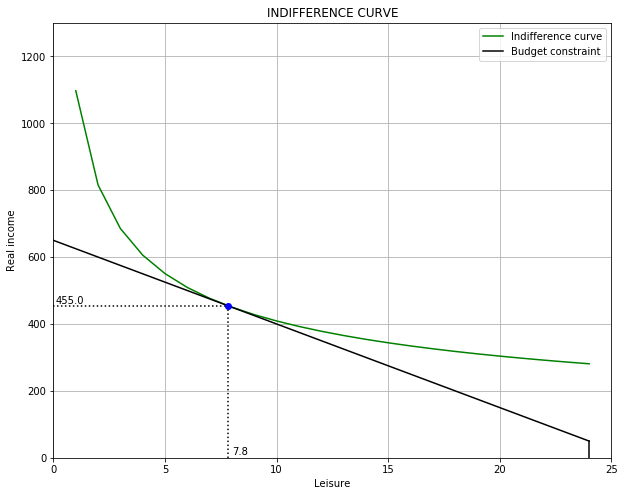

In [2]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND VECTORS"
T = 25                           # Available hours to work
beta = 0.7                       # Utility elasticity of consumption
I = 50                           # Non-labor income
L = np.arange(T)                 # Array of labor hours from 0 to T
C = np.zeros(T)                  # Empty array of consumption
B = np.zeros(T)                  # Empty array for the budget constraint
rW = 25                          # Real wage

"3|CALCULATE OPTIMAL VALUES AND DEFINE FUNCTIONS"
Ustar = (beta*(I+24*rW))**beta * ((1-beta)*(I+24*rW)/rW)**(1-beta)
Lstar = (1-beta)*((I+24*rW)/rW)
Cstar = beta*(I+24*rW)

def C_indff(U, L, beta):         # Create consumption function
    C_indiff = (U/L**(1-beta))**(1/beta)
    return C_indiff

def Budget(I, rW, L):            # Create budget constraint
    Budget = (I + 24*rW) - rW*L
    return Budget

B[0] = Budget(I, rW, 0)
for t in range(1,T):
    C[t] = C_indff(Ustar, L[t], beta)
    B[t] = Budget(I, rW, L[t])        

"4|PLOT THE INDIFFERENCE CURVE AND THE BUDDGET CONSTRAINT"
y_max = 2*Budget(I, rW, 0)

v = [0, T, 0, y_max]                               # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="INDIFFERENCE CURVE", xlabel="Leisure", ylabel="Real income")
ax.grid()
ax.plot(L[1:T], C[1:T], "g-", label="Indifference curve")
ax.plot(L[0:T], B[0:T], "k-", label="Budget constraint")
plt.axvline(x=T-1  , ymin=0, ymax=I/y_max, color='k') # Add non-labor income
plt.axvline(x=Lstar, ymin=0, ymax = Cstar/y_max, ls=':', color='k') # Lstar
plt.axhline(y=Cstar, xmin=0, xmax = Lstar/T    , ls=':', color='k') # Cstar
plt.plot(Lstar, Cstar, 'bo')                                        # Point
plt.text(0.1      ,  Cstar+5, np.round(Cstar, 1), color="k")
plt.text(Lstar+0.2,  10     , np.round(Lstar, 1), color="k")
ax.legend() 
plt.axis(v)                                         # Use 'v' as the axes range
plt.show()

---
Labor supply $N^S$ is the number of hours **not spent** in leisure. Note that $N^S$ decreases with $I$ and increases with $(w/P)$.

\begin{align}
    N^S &= 24 - L^*                                                  \\
    N^S &= 24 - (1-\beta) \left[\frac{I + 24 (w/P)}{(w/P)} \right] 
\end{align}

The following code shows labor supply (in black) and shocks to non-labor income $\Delta I = 25$ (in blue) and to consumption elasticity of ulility $\Delta \beta = 0.10$ (in red). Note that in this construction $N^S$ does not bend-backwards.

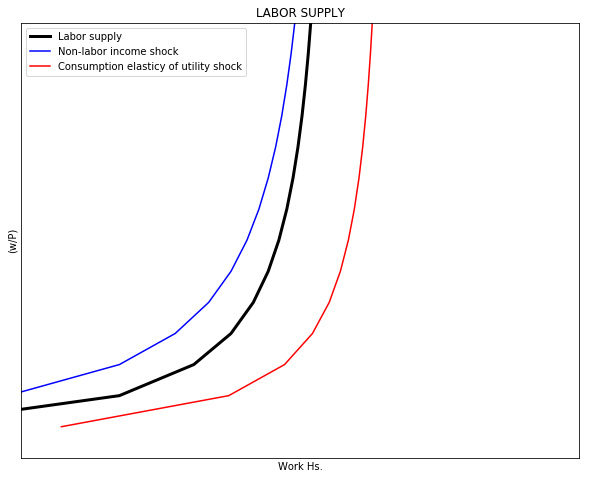

In [3]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library

"2|DEFINE PARAMETERS AND ARRAYS"
size = 50
T = 25                           # Available hours to work
beta = 0.6                       # Utility elasticity of consumption
I = 50                           # Non-labor income
rW   = np.arange(size)           # Vector of real wages
Ns   = np.zeros(size)            # Array of labor hours from 0 to T
Ns_I = np.zeros(size)            # Shock to non-labor income
Ns_b = np.zeros(size)            # Shock to consumption elasticity of utility

"3|LABOR SUPPLY"
def Lsupply(rW, beta, I):
    Lsupply = 24 - (1-beta)*((24*rW + I)/rW)
    return Lsupply

I_shock = 25
b_shock = 0.10
for i in range(1,size):
    Ns[i]   = Lsupply(i, beta, I)
    Ns_I[i] = Lsupply(i, beta, I+I_shock)
    Ns_b[i] = Lsupply(i, beta+b_shock, I)
    
"4|PLOT LABOR SUPPLY"
y_max = np.max(Ns)

v = [0, T, 0, y_max]                               # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="LABOR SUPPLY", xlabel="Work Hs.", ylabel=r'(w/P)')
ax.grid()
ax.plot(Ns[1:T]  , rW[1:T], "k", label="Labor supply", linewidth=3)
ax.plot(Ns_I[1:T], rW[1:T], "b", label="Non-labor income shock")
ax.plot(Ns_b[1:T], rW[1:T], "r", label="Consumption elasticy of utility shock")
ax.yaxis.set_major_locator(plt.NullLocator())      # Hide ticks
ax.xaxis.set_major_locator(plt.NullLocator())      # Hide ticks
ax.legend() 
plt.axis(v)                                        # Use 'v' as the axes range
plt.show()

## 3. EQUILIBRIUM

We can now calculate the equilibrium condition, the value of $(w/P)_0$ which makes $N^D\left(\left(\frac{w}{P}\right)_0\right) = N^S\left(\left(\frac{w}{P}\right)_0\right)$. Then, we can define a function $\Theta$ equal to zero at $\left(\frac{w}{P}\right)_0$:

\begin{align}
    \Theta \left[ \left(\frac{w}{P}\right)_0\right] &= 0 = N^D \left[\left(\frac{w}{P} \right)_0\right] - N^S \left[\left(\frac{w}{P}\right)_0\right] \\
    \Theta \left[ \left(\frac{w}{P}\right)_0\right] &= 0 = \underbrace{\left[ K \cdot \left[\frac{(1-\alpha)A}{(w/P)}\right]^{1/\alpha} \right]}_{N^D} - \underbrace{\left[ 24  (1-\beta) \left[\frac{I + 24 (w/P)}{(w/P)} \right] \right]}_{N^S}
\end{align}

We can ask Python to calculate the value (root) of $\left( \frac{w}{P} \right)$ that makes $\Theta = 0$. For this we need the "root" function from the `SciPy` library. The cade has four sections. Section 1 imports the required packages. Section 2 defines the paramters and arrays. Section 3 find the dequilibrium values. And section 4 plots the results.

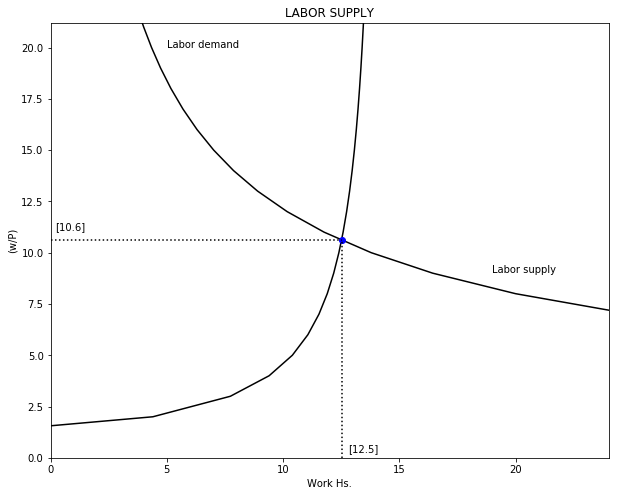

In [6]:
"1|IMPORT PACKAGES"
import numpy as np               # Package for scientific computing with Python
import matplotlib.pyplot as plt  # Matplotlib is a 2D plotting library
from scipy.optimize import root  # Package to find the roots of a function

"2|DEFINE PARAMETERS AND VECTORS"
size = 50
T = 24                           # Available hours to work
# Demand parameters
K = 20                           # Capital stock
A = 20                           # Total factor productivity
alpha = 0.6                      # Output elasticity of capital
Nd   = np.zeros(T)               # Array of labor demand
# Supply parameters
I = 50                           # Non-labor income
beta = 0.6                       # Utility elasticity of consumption
Ns   = np.zeros(size)            # Array of labor supply
# Arrays
rW = np.arange(size)             # Real wage
Nd = np.zeros(size)              # Labor demand
Ns = np.zeros(size)              # Labor supply

"3|OPTIMIZATION PROBLEM: FIND EQUILIBRIUM VALUES"
def Ndemand(A, K, rW, alpha):
    Nd = K * ((1-alpha)*A/rW)**(1/alpha)
    return Nd

def Nsupply(rW, beta, I):
    Lsupply = T - (1-beta)*((24*rW + I)/rW)
    return Lsupply

def Eq_Wage(rW):
    Eq_Wage = Ndemand(A, K, rW, alpha) - Nsupply(rW, beta, I)
    return Eq_Wage

rW_0 = 10
rW_star = root(Eq_Wage, rW_0)
N_star = Nsupply(rW_star.x, beta, I)

"4|PLOT LABOR MARKET EQUILIBRIUM"
for i in range(1, size):
    Nd[i] = Ndemand(A, K, i, alpha)
    Ns[i] = Nsupply(i, beta, I)

y_max = rW_star.x*2
v = [0, T, 0, y_max]                               # Set the axes range
fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="LABOR SUPPLY", xlabel="Work Hs.", ylabel=r'(w/P)')
ax.plot(Ns[1:T], rW[1:T], "k", label="Labor supply")
ax.plot(Nd[1:T], rW[1:T], "k", label="Labor demand")
plt.plot(N_star, rW_star.x, 'bo') 
plt.axvline(x=N_star   , ymin=0, ymax=rW_star.x/y_max, ls=':', color='k')
plt.axhline(y=rW_star.x, xmin=0, xmax=N_star/T       , ls=':', color='k')
plt.text(5 , 20, "Labor demand")
plt.text(19,  9, "Labor supply")
plt.text(0.2       , rW_star.x+0.5, np.round(rW_star.x, 1))
plt.text(N_star+0.3, 0.3          , np.round(N_star, 1))
plt.axis(v)                                         # Use 'v' as the axes range
plt.show()